In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sightings = pd.read_pickle('sightings_merged.pkl')

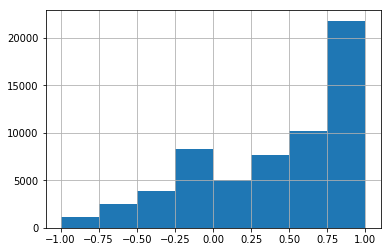

In [3]:
hist = sightings['sentiment_nltk'].hist(bins=8)

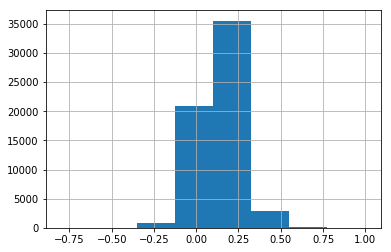

In [4]:
hist = sightings['sentiment_TextBlob'].hist(bins=8)

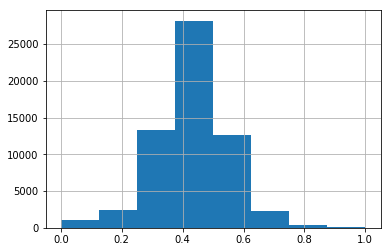

In [5]:
hist = sightings['objectivity_TextBlob'].hist(bins=8)

In [6]:
# 'time_num', 'Lat', 'Lon', 

X = sightings[['rel0_2007', 'rel1_2007', 'rel2_2007',
               'rel3_2007', 'rel4_2007',
               'rel5_2007', 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007',
               'rel0_2014', 'rel1_2014', 'rel2_2014', 'rel3_2014', 'rel4_2014', 
               'rel5_2014','par0_2014', 'par1_2014', 'par2_2014', 'par3_2014']]

# sentiment_Vader, sentiment_nltk, sentiment_TextBlob, objectivity_TextBlob 
y = sightings.sentiment_nltk

In [7]:
from sklearn.decomposition import PCA

for n in range(1, len(X.columns)+1):
    target_number_of_components = n

    pca = PCA(n_components=target_number_of_components)
    pca.fit(X)
    print(f"Total variance accounted using {n} components: {round(pca.explained_variance_ratio_.sum()*100,4)}%")

print(f"Total variance accounted using all components: {round(PCA(n_components=None).fit(X).explained_variance_ratio_.sum(),4)*100}%")

Total variance accounted using 1 components: 42.172%
Total variance accounted using 2 components: 62.6175%
Total variance accounted using 3 components: 73.3814%
Total variance accounted using 4 components: 81.5884%
Total variance accounted using 5 components: 87.7152%
Total variance accounted using 6 components: 90.9511%
Total variance accounted using 7 components: 93.5054%
Total variance accounted using 8 components: 95.4931%
Total variance accounted using 9 components: 96.8372%
Total variance accounted using 10 components: 97.9576%
Total variance accounted using 11 components: 98.7571%
Total variance accounted using 12 components: 99.2175%
Total variance accounted using 13 components: 99.5749%
Total variance accounted using 14 components: 99.8107%
Total variance accounted using 15 components: 99.9354%
Total variance accounted using 16 components: 100.0%
Total variance accounted using 17 components: 100.0%
Total variance accounted using 18 components: 100.0%
Total variance accounted u

In [8]:
n_pcs = pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df.head(len(X.columns))

,0,1
0,PC0,rel1_2007
1,PC1,rel1_2014
2,PC2,par2_2014
3,PC3,rel2_2007
4,PC4,rel3_2014
5,PC5,par3_2014
6,PC6,rel3_2007
7,PC7,par3_2007
8,PC8,par1_2007
9,PC9,par3_2007


In [9]:
target_number_of_components = 8

pca = PCA(n_components=target_number_of_components)
pca.fit(X)
pca.explained_variance_ratio_

array([0.42171968, 0.20445545, 0.10763921, 0.08206918, 0.06126876,
       0.03235877, 0.02554285, 0.01987712])

In [10]:
pca_features = []
for p in range(1, target_number_of_components+1):
    pca_features.append("PC" + str(p))
pca_features

pca_transformed = pca.transform(X)

X_princ = pd.DataFrame(data=pca_transformed, columns = pca_features)
X_princ

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291311,-0.112881,-0.030870,0.004530,0.065586,-0.008724,0.054299,-0.001039
1,-0.361009,0.261823,0.420139,-0.270144,-0.139441,0.263161,0.033244,0.014184
2,-0.121976,0.054056,-0.272774,0.112967,-0.211300,0.076897,0.004136,0.016102
3,-0.121976,0.054056,-0.272774,0.112967,-0.211300,0.076897,0.004136,0.016102
4,-0.382811,-0.048949,-0.089062,0.024917,0.069187,0.013595,0.050480,0.047602
...,...,...,...,...,...,...,...,...
60407,-0.074762,-0.168521,-0.027316,-0.057092,0.026087,-0.064419,-0.030981,0.042656
60408,0.089665,0.157440,0.264802,0.506342,-0.001415,0.090976,-0.135858,-0.066317
60409,-0.228674,0.034123,0.189060,-0.142960,-0.011792,0.029902,-0.026021,0.022604
60410,-0.269264,-0.503933,0.028190,-0.043965,0.072074,-0.019549,0.032474,-0.010769


In [11]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_princ, y, test_size=.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48329, 8), (12083, 8), (48329,), (12083,))

In [13]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors._regression import KNeighborsRegressor
from sklearn.tree._classes import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

results_df = pd.DataFrame(columns = ["Model", "Training RMSE", "Training R2", "Test RMSE", "Test R2"])

reg_list = [SGDRegressor(), LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(), SVR(kernel='rbf')]

for mod in reg_list:
    reg_model = mod
    reg_model.fit(X_train, y_train)

    reg_model_pred_train = reg_model.predict(X_train)
    reg_model_pred_test = reg_model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, reg_model_pred_train)
    mse_test = mean_squared_error(y_test, reg_model_pred_test)

    r2_train = r2_score(y_train, reg_model_pred_train)
    r2_test = r2_score(y_test, reg_model_pred_test)
    
    temp = pd.DataFrame({"Model": [mod],
                         "Training RMSE": [mse_train], 
                         "Training R2": [r2_train],
                         "Test RMSE": [mse_test],
                         "Test R2": [r2_test]})
    results_df = results_df.append(temp, ignore_index=True)

In [14]:
results_df.sort_values(by="Test RMSE")

,Model,Training RMSE,Training R2,Test RMSE,Test R2
0,SGDRegressor(),0.244896,0.001024,0.245693,0.001679
1,LinearRegression(),0.244837,0.001265,0.245753,0.001436
2,"(DecisionTreeRegressor(max_features='auto', ra...",0.244317,0.003387,0.245804,0.001229
4,DecisionTreeRegressor(),0.244314,0.003396,0.245806,0.001222
5,SVR(),0.262155,-0.069380,0.265533,-0.078934
3,KNeighborsRegressor(),0.308153,-0.257012,0.307109,-0.247871
